# Which Factors in Bone Marrow Transplants Can Most Accurately Predict the Survival Rates of the Recipients? 
### Group member: 
Ellie Hu, Grace Clarke, João P. Valino, Sarah Lee, Matthew Ocampo
## Introductions:
Bone marrow transplants are when healthy stem cells from a donor are implanted in a patient to replace bone marrow that is not working properly and not producing enough blood cells. When specifying treating either early or advanced leukemia, bone marrow transplants have a higher survival rate of 65% compared to advanced leukemia where they have a survival rate of only 25% (Schmitz et al., 2006). Bone marrow transplants have survival rate of 46% over two years compared to other treatments such as peripheral-blood transplants which have a survival rate of 51% over the same time period (Anasetti et al., 2012).The transplant types also have a similar relapse rate (Schmitz et al., 2006).Bone marrow transplants also have a lower chance of graft failure, but a lower rate of chronic GVHD compared to peripheral-blood transplants which makes them viable options to treat leukemia.(Anasetti et al., 2012).
## Research Question:
It is important that a transplant is successful as the resulting recovery time is lengthy for recipients as they may need up to a year off of work. This leads to our research question: 
**Is there a relationship between donor and recipient ages/blood types/relapse/PLT recovery and the survival rates of the recipients? Can survival rate be predicted based on these variables?**


## Data Set Information
**Title of Data Set**: Bone marrow transplant: children Data Set

**Description**: The data set describes pediatric patients with several hematologic diseases: malignant disorders (i.a. acute lymphoblastic leukemia, acute myelogenous leukemia, chronic myelogenous leukemia, myelodysplastic syndrome) and nonmalignant cases (i.a. severe aplastic anemia, Fanconi anemia, with X-linked adrenoleukodystrophy). All patients were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.
- Table Contents:
- Area: Life
- Set Characteristics: Multivariate
- Attribute Characteristics: Integer, Real
- number of Instances: 187
- number of Attributes: 39
- number of Attributes We Will Use: 7
- Missing Values? Yes

https://archive.ics.uci.edu/ml/datasets/Bone+marrow+transplant%3A+children

# Methods and Code

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# look through the dataset to see what type of variables we have
bone_data <- read_csv("data/boneMarrow.csv")
head(bone_data)
glimpse(bone_data)

Rows: 187 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): RecipientABO, RecipientRh, ABOmatch, CMVstatus, DonorCMV, Recipien...
dbl (25): id, Recipientgender, Stemcellsource, Donorage, Donorage35, IIIV, G...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,⋯,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,22.83014,0,1,0,1,1,1,⋯,1,7.20,1.33876,5.38,35,19,51,32,999,0
2,1,0,23.34247,0,1,0,-1,-1,1,⋯,1,4.50,11.078295,0.41,20.6,16,37,1000000,163,1
3,1,0,26.39452,0,1,0,-1,-1,1,⋯,1,7.94,19.01323,0.42,23.4,23,20,1000000,435,1
4,0,0,39.68493,1,1,0,1,2,1,⋯,?,4.25,29.481647,0.14,50,23,29,19,53,1
5,0,1,33.35890,0,0,0,1,2,0,⋯,1,51.85,3.972255,13.05,9,14,14,1000000,2043,0
6,1,0,27.39178,0,0,0,2,0,1,⋯,1,3.27,8.412758,0.39,40,16,70,1000000,2800,0


Rows: 187
Columns: 38
$ id                   <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…
$ Recipientgender      <dbl> 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1…
$ Stemcellsource       <dbl> 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1…
$ Donorage             <dbl> 22.83014, 23.34247, 26.39452, 39.68493, 33.35890,…
$ Donorage35           <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1…
$ IIIV                 <dbl> 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1…
$ Gendermatch          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ DonorABO             <dbl> 1, -1, -1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0,…
$ RecipientABO         <chr> "1", "-1", "-1", "2", "2", "0", "1", "1", "0", "0…
$ RecipientRh          <chr> "1", "1", "1", "1", "0", "1", "0", "1", "1", "1",…
$ ABOmatch             <chr> "0", "0", "0", "1", "1", "1", "1", "1", "1", "1",…
$ CMVstatus            <chr> "3", "0", "2", "1", "0", "?", "?", "1", "2", "2",…
$ DonorCMV        

- `table1`: the first 6 observation of the data
- `text1`: the overview of the variables present in the database

## Part 1: Original data visualization (proposal)

`METHOD` We will be focusing on eight variables for our analysis. The first four include donor_age, recipient_age, donor_ABO and recipient_ABO. Our aim is to analyze these variables by comparing similarities and differences between their respective pairs (for example, comparing the age of a donor to the age of their respective recipient). For age, we will compare the ranges in which donor age and recipient age differ, while for ABO (blood type), we will focus on matching blood types or non-matching blood types. This may involve the creation of new variables, such as the difference between ages of donor and recipient. From here, we can compare different observations based on how these variables differ.

In [3]:
# select only the data related to blood type and age
bone_selected <- bone_data |>
select(Donorage, ABOmatch, Recipientage, DonorABO, RecipientABO, Relapse, survival_time, survival_status)|>
mutate(survival_status = as_factor(survival_status))
head(bone_selected)

Donorage,ABOmatch,Recipientage,DonorABO,RecipientABO,Relapse,survival_time,survival_status
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
22.83014,0,9.6,1,1,0,999,0
23.34247,0,4.0,-1,-1,1,163,1
26.39452,0,6.6,-1,-1,1,435,1
39.68493,1,18.1,1,2,0,53,1
33.35890,1,1.3,1,2,0,2043,0
27.39178,1,8.9,2,0,0,2800,0


 - `table1.0.1`: the first 6 observation with data related to blood type and age

In [5]:
# see the summary of our database
set.seed(1)
bone_split <- initial_split(bone_selected, prop=0.7, strata=survival_status)
bone_train <- training(bone_split)
bone_test <- testing(bone_split)
train_summarize <- bone_train |>
group_by(survival_status) |>
summarize(count=n())

train_summarize

survival_status,count
<fct>,<int>
0,71
1,59


 - `table 1.0.2` the survival count of the training data

### Age analysis

In [8]:
bone_age <- bone_train |>
select(Donorage,Recipientage,survival_time,survival_status)|>
mutate(age_diff = Donorage-Recipientage)|>
mutate(DonorAgeGroup = cut(Donorage, breaks = c(0,5,10,15,20,25,30,35,100),
              labels=c("<5","5-10","10-15","15-20","20-25","25-30","30-35","35+")))|>
mutate(RecipientAgeGroup = cut(Recipientage, breaks = c(0,5,10,15,20,25,30,35,100),
              labels=c("<5","5-10","10-15","15-20","20-25","25-30","30-35","35+")))
head(bone_age)

Donorage,Recipientage,survival_time,survival_status,age_diff,DonorAgeGroup,RecipientAgeGroup
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>
22.83014,9.6,999,0,13.23014,20-25,5-10
33.35890,1.3,2043,0,32.05890,30-35,<5
29.73151,1.9,599,0,27.83151,25-30,<5
36.80000,13.4,2503,0,23.40000,35+,10-15
40.82192,4.7,1615,0,36.12192,35+,<5
31.74520,17.7,884,0,14.04520,30-35,15-20


 - `table 1.1.1`: the first 6 observation of data related to age, with additional column of donor's age group and recipient's age group

In [18]:
Recipient_Age_summarize <- bone_age |>
group_by(RecipientAgeGroup)|>
summarize(RecipientAgeCount=n())|>
rename(age=RecipientAgeGroup)

Donor_Age_summarize <- bone_age |>
group_by(DonorAgeGroup)|>
summarize(DonorAgeCount=n())|>
rename(age=DonorAgeGroup)

options(repr.matrix.max.rows=9) # to show all the rows.
age_summarize <- full_join(x=Donor_Age_summarize,y=Recipient_Age_summarize,by="age")|>
arrange(by=age)|>
rename(donor_age = DonorAgeCount,recipient_age = RecipientAgeCount)
age_summarize

age,donor_age,recipient_age
<fct>,<int>,<int>
<5,NA,35
5-10,NA,31
10-15,NA,35
15-20,3,27
20-25,27,2
25-30,13,NA
30-35,27,NA
35+,60,NA


 - `table1.1.2`: the summary of donor's age and recipient's age

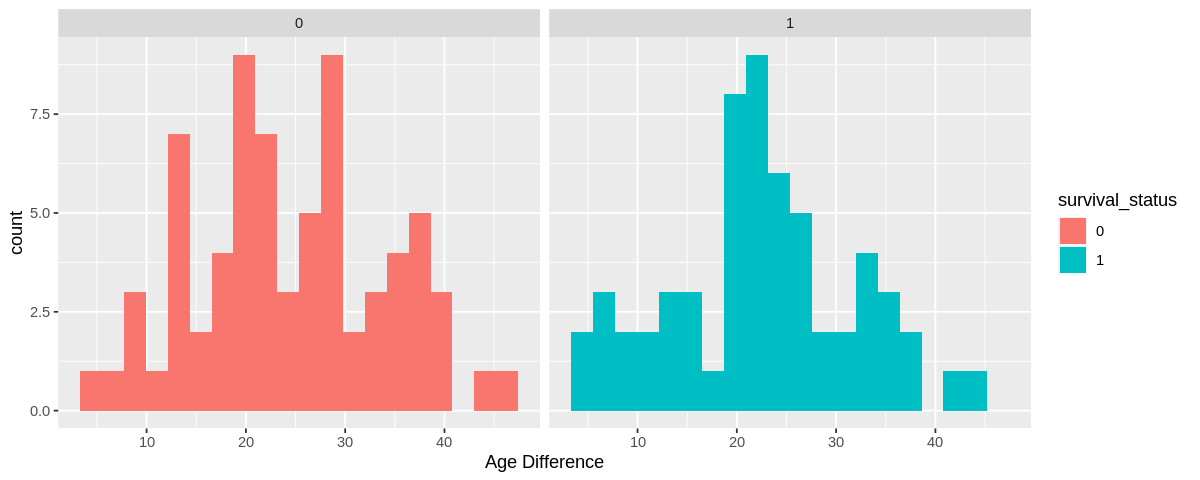

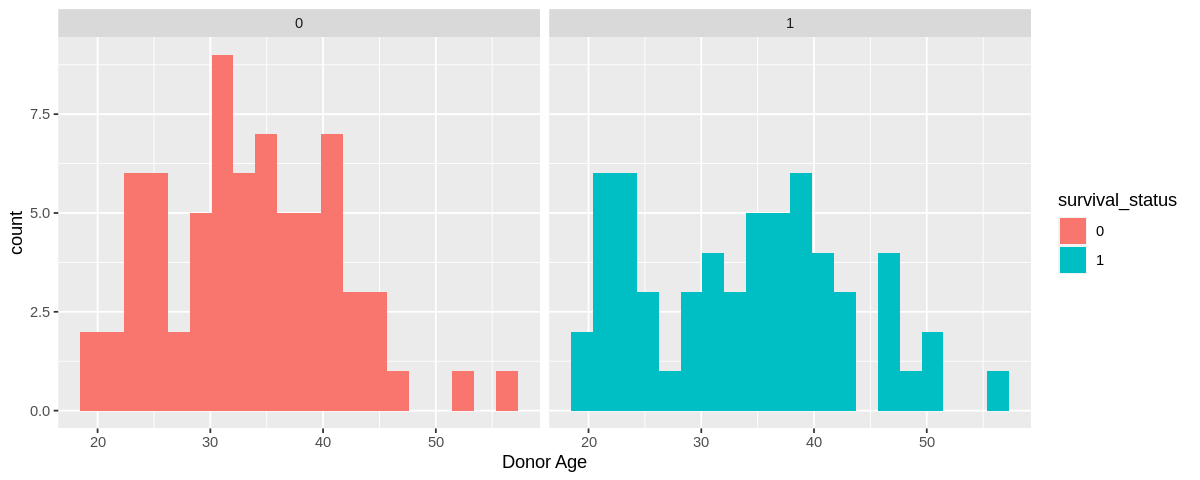

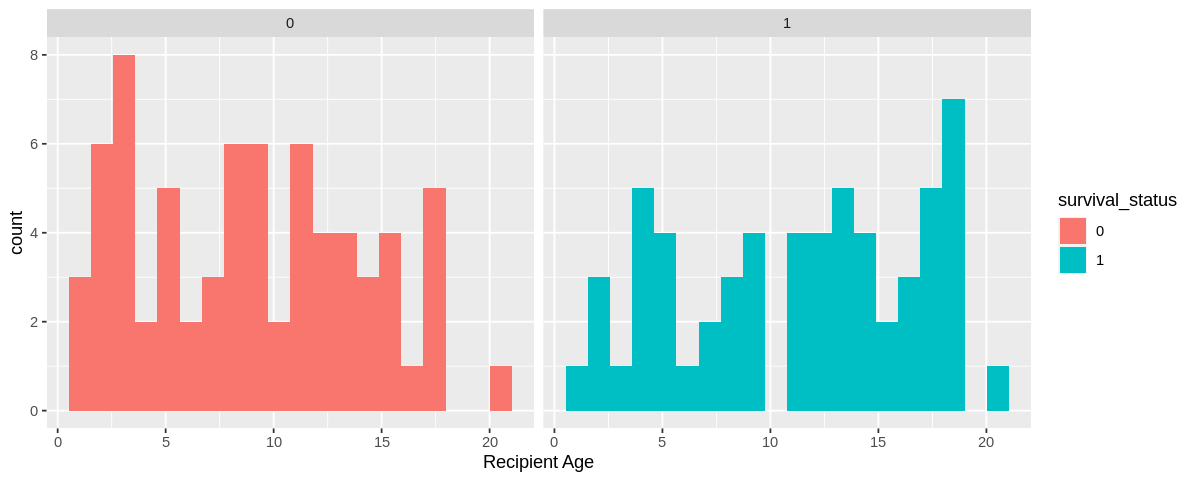

In [19]:
# visualize the distribution of donor's age, recipient's age, and the difference between donor and recipient's age
options(repr.plot.width=10,repr.plot.height=4)
age_diff_plot <- bone_age |>
ggplot(aes(x=age_diff,fill=survival_status))+
geom_histogram(bins=20)+
labs(x="Age Difference", y = "count",color= "survival status")+
facet_grid(cols=vars(survival_status))
age_diff_plot

Donor_age_plot <- bone_age |>
ggplot(aes(x=Donorage,fill=survival_status))+
geom_histogram(bins=20)+
facet_grid(cols=vars(survival_status))+
labs(x="Donor Age", y = "count",color= "survival status")
Donor_age_plot

Recipient_age_plot <- bone_age |>
ggplot(aes(x=Recipientage,fill=survival_status))+
geom_histogram(bins=20)+
facet_grid(cols=vars(survival_status))+
labs(x="Recipient Age", y = "count",color= "survival status")
Recipient_age_plot

 - `plot1.1.1`: the distribution of age difference grouped into survive(1) and didn't survive(0)
 - `plot1.1.2`: the distribution of donor's age grouped into survive(1) and didn't survive(0)
 - `plot1.1.3`: the distribution of recipient's age grouped into survive(1) and didn't survive(0)
 - All three plots doesn't show any significant relationship with the survival rates

### Blood visualization

In [20]:
# select only the variables related to the blood type
bone_blood <- bone_train |>
select(DonorABO,RecipientABO,ABOmatch,survival_time,survival_status)

# make the data tidy by filtering out missing values
bone_blood_filtered <- bone_blood |>
filter(ABOmatch != "?")

head(bone_blood_filtered)

DonorABO,RecipientABO,ABOmatch,survival_time,survival_status
<dbl>,<chr>,<chr>,<dbl>,<fct>
1,1,0,999,0
1,2,1,2043,0
0,-1,1,599,0
1,1,0,2503,0
2,0,1,1615,0
1,0,1,884,0


 - `table1.2.1`: the first 6 observation of the data with variables related to blood type

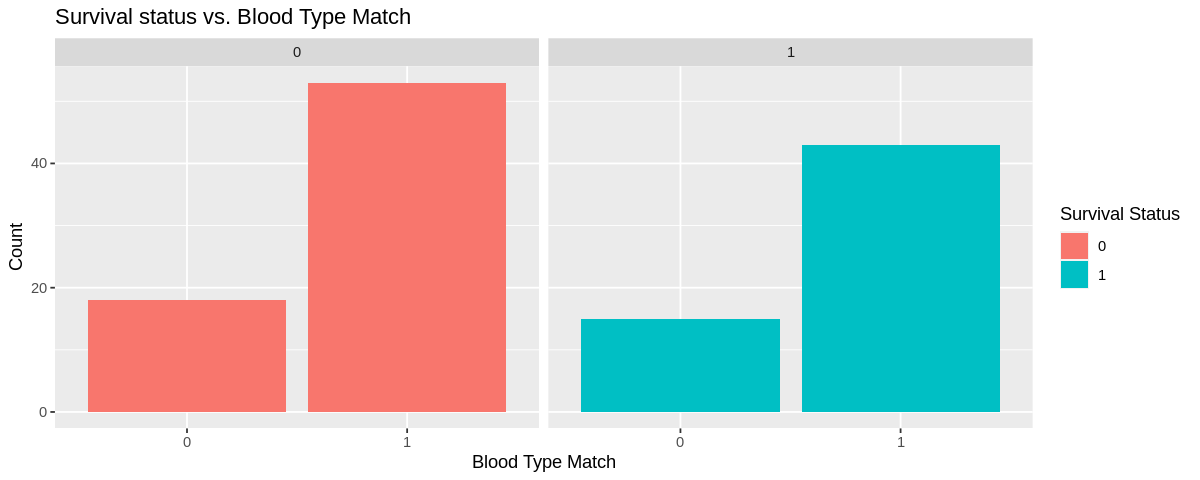

In [195]:
# Blood match visualization:
options(repr.plot.width=10,repr.plot.height=4)

blood_match_plot <- bone_blood_filtered |>
ggplot(aes(x=ABOmatch,fill=survival_status))+
geom_bar()+
facet_grid(cols=vars(survival_status)) +
ggtitle("Survival status vs. Blood Type Match") +
labs(x = "Blood Type Match", y = "Count", fill = "Survival Status") 

blood_match_plot

 - `plot1.2.1`: the bar chart comparing the blood match with survival status. This chart doesn't show an obvious relationship between the blood match and survival status

In [21]:
# 'DonorABO''RecipientABO'
blood_summarize <- bone_train |>
select(DonorABO, survival_status)|>
group_by(DonorABO,survival_status) |>
summarize(count=n())|>
mutate(DonorABO = case_when(
      DonorABO == -1 ~ 'B',
      DonorABO == 1 ~ 'A',
      DonorABO == 0 ~ 'O',
      DonorABO == 2 ~ 'AB'))

# transpose the dataframe to better visualize the data
t(blood_summarize)

`summarise()` has grouped output by 'DonorABO'. You can override using the
`.groups` argument.


DonorABO,B,B,O,O,A,A,AB,AB
survival_status,0,1,0,1,0,1,0,1
count,12,7,26,22,26,28,7,2


 - `table1.2.2`: the count of observation grouped by donor's blood type and survival status

In [201]:
# see the summary of donor's blood type / Recipient's blood type and the survival rate
options(repr.plot.width=6,repr.plot.height=4)
blood_summarize2 <- bone_train |>
select(RecipientABO, DonorABO, survival_status) |>
  mutate(RecipientABO = case_when(
      RecipientABO == -1 ~ 'B',
      RecipientABO == 1 ~ 'A',
      RecipientABO == 0 ~ 'O',
      RecipientABO == 2 ~ 'AB')) |>
mutate(DonorABO = case_when(
      DonorABO == -1 ~ 'B',
      DonorABO == 1 ~ 'A',
      DonorABO == 0 ~ 'O',
      DonorABO == 2 ~ 'AB'))

#donor
Donor_summarize <- blood_summarize2 |>
group_by(DonorABO, survival_status)|>
summarize(count=n())|>
pivot_wider(names_from=survival_status,
            values_from=count) |>
rename("survive" = "1", "death" = "0")|>
mutate(survival_rate = survive/(death+survive))
Donor_summarize

#recipient
Recipient_summarize <- blood_summarize2 |>
group_by(RecipientABO, survival_status)|>
summarize(count=n())|>
pivot_wider(names_from=survival_status,
            values_from=count) |>
rename("survive" = "1", "death" = "0")|>
mutate(survival_rate = survive/(death+survive))|>
filter(RecipientABO != "NA")
Recipient_summarize

`summarise()` has grouped output by 'DonorABO'. You can override using the
`.groups` argument.


DonorABO,death,survive,survival_rate
<chr>,<int>,<int>,<dbl>
A,26,28,0.5185185
AB,7,2,0.2222222
B,12,7,0.3684211
O,26,22,0.4583333


`summarise()` has grouped output by 'RecipientABO'. You can override using the
`.groups` argument.


RecipientABO,death,survive,survival_rate
<chr>,<int>,<int>,<dbl>
A,28,26,0.4814815
AB,5,2,0.2857143
B,20,15,0.4285714
O,18,15,0.4545455


 - `table1.2.3`: the survival rate based on donor's blood type. Considering the amount of samples we have, we think the result might not be able to represent the whole population.
 - `table1.2.4`: the survival rate based on recipient's blood type. Considering the amount of samples we have, we think the result might not be able to represent the whole population.

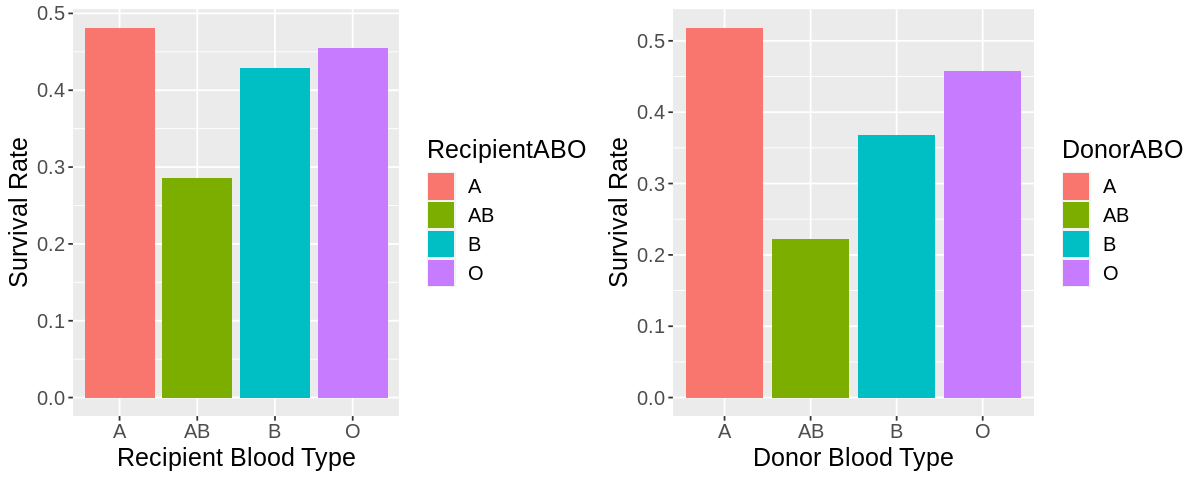

In [214]:
# visualize the summary with bar chart
Donor_plot <- Donor_summarize |>
ggplot(aes(x = as.factor(DonorABO), y = survival_rate, fill=DonorABO))+
geom_bar(stat = "identity")+
labs(x="Donor Blood Type", y = "Survival Rate")+
theme(text = element_text(size=15))

Recipient_plot <- Recipient_summarize |>
ggplot(aes(x = as.factor(RecipientABO), y = survival_rate, fill=RecipientABO))+
geom_bar(stat = "identity")+
labs(x="Recipient Blood Type", y = "Survival Rate")+
theme(text = element_text(size=15))

options(repr.plot.width=10, repr.plot.height=4)
grid.arrange(Recipient_plot, Donor_plot, ncol=2)

 - `plot1.2.2`: the plot of recipient's blood type vs the survival rate.
 - `plot1.2.3`: the plot of donor's blood type vs the survival rate.

# Part2: New version of data preprocessing

`METHOD`
 - We will also consider the variables PLT_recovery and relapse to strengthen the accuracy of predictions. 
 - These two new parameters were chosen based on an analysis of which variables out of our selection offered the highest correlation with the survival_status metric. In order to achieve such analysis, the correlation table was formed using the corr function. As PLTRecovery and Relapse had the highest correlation out of all observed variables, they were the best suited to serve as new parameters.
 - Additionally, asides from analyzing the correlation of each individual parameter and the survival status, we also created an analysis in order to determine which combination of parameters would offer the best accuracy for our prediction. This was achieved through forward selection, where several models were created using different combinations of variables and their respective accuracies were computed.
 - Further correlational analysis was done using two methods. The first method consisted in the use of scatterplots regarding the relation between the recipient’s age and relapse and recipient age and PLTRecovery and their respective survival status. The second method first created summarized tables analyzing the relation between the PLTRecovery and Relapse parameters and their relation with survival rate, these results were then plotted on bar graphs, in order to provide a clearer depiction of the relationship between the variables.

In [24]:
## tidy data
#1. discard any NA values
#2. select only the numeric values
#3. transform non numeric values into numeric values that are applicable (CD3dCD34, CD3dkgx10d8 and Rbodymass)
filtered_bone <- na.omit(bone_data)|>
select(-survival_time, -RecipientABO, -RecipientRh, -CMVstatus,-DonorCMV, -RecipientCMV, -Disease, -Antigen,-Alel,-extcGvHD)|>
mutate(survival_status = as_factor(survival_status),
        CD3dCD34 = as.numeric(CD3dCD34),
        CD3dkgx10d8 = as.numeric(CD3dkgx10d8),
        Rbodymass = as.numeric(Rbodymass),
        ABOmatch = as.numeric(ABOmatch))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [25]:
# split the tidy data into training and testing dataset
set.seed(66)
bone_split <- initial_split(filtered_bone, prop = 0.75, strata = survival_status)
bone_training <- training(bone_split)
bone_testing <- testing(bone_split)

In [26]:
# use the correlation function to see which numeric varible has the closest relationship with the survival status
num_bone <- bone_training |>
mutate(survival_status = as.numeric(survival_status))
# glimpse(num_bone)
corr <- round(cor(num_bone), 1)
corr <- as.data.frame(corr)
cor2 <- corr |> 
select(survival_status)|>
arrange(desc(survival_status))
cor2 <- t(cor2)
cor2

,survival_status,PLTrecovery,Relapse,Recipientage,Recipientage10,Recipientageint,ANCrecovery,id,Donorage35,IIIV,⋯,DonorABO,HLAmismatch,Stemcellsource,ABOmatch,time_to_aGvHD_III_IV,aGvHDIIIIV,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass
survival_status,1,0.4,0.3,0.2,0.2,0.2,0.2,0.1,0.1,0.1,⋯,0,0,-0.1,-0.1,-0.1,-0.2,-0.2,NA,NA,NA


 - `table2.0`: the correlation of the variables vs the survival status. Since the highest ones are PLTrecovery, Relapse, Recipientage, ANCrecovery and Donorage (ignoring the Recipientage10 and Recipientageint since they are the basically the same property as Recipientage), we chose these 5 variables to be the predictors we choose from.

In [27]:
# choose the parameter we want from the elements that has the closest relationship with the survival_status
bone_training <- bone_training |>
select(PLTrecovery, Relapse, Recipientage, Donorage, ANCrecovery, survival_status)|>
mutate(survival_status = as.factor(survival_status))
head(bone_training)

PLTrecovery,Relapse,Recipientage,Donorage,ANCrecovery,survival_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
51,0,9.6,22.83014,19,0
70,0,8.9,27.39178,16,0
14,0,7.9,32.64110,15,0
17,0,4.7,28.78356,16,0
13,0,1.9,29.73151,12,0
16,0,13.4,36.80000,11,0


 - `table2.1`: the first 6 observation of our data, selecting only the 5 most related variables.

In [150]:
# apply the forward selection to select which variables other than Recipientage should we include in our analysis
set.seed(100)
names <- colnames(bone_training |> select(-survival_status, -Recipientage))
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")
kval <- tibble(neighbors=seq(from=1, to=10,by=1))

bone_vfold <- vfold_cv(bone_training, v=5, strata = survival_status)
n_total <- length(names)
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c("Recipientage", selected, names[[j]])
        model_string <- paste("survival_status", "~", paste(preds_new, collapse="+"))
        model_string
        # create a recipe from the model string
        bone_recipe <- recipe(as.formula(model_string), data = bone_training) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(bone_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = bone_vfold, grid = kval) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

In [151]:
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,survival_status ~ Recipientage+Relapse,0.6686371
2,survival_status ~ Recipientage+Relapse+PLTrecovery,0.7276318
3,survival_status ~ Recipientage+Relapse+PLTrecovery+ANCrecovery,0.7276318
4,survival_status ~ Recipientage+Relapse+PLTrecovery+ANCrecovery+Donorage,0.7202244


 - `table2.2`: the result of the forward selection, which shows the prediction accuracy of different combination of recipient's age and other variables. Based on the result, we decided to choose the combination of Recipientage+Relapse+PLTrecovery, which is the age of the recipient, relapse or not, and the platelet recovery count.
 
`METHOD`
- We chose to add relapse and platelet recovery as  variables to our study as blood type was not standardizable nor did it offer a relationship to base a prediction off of.
- With all predictors and their respective relation to the survival status computed and analyzed, we then proceed to the actual building and application of a classification model in order to predict.


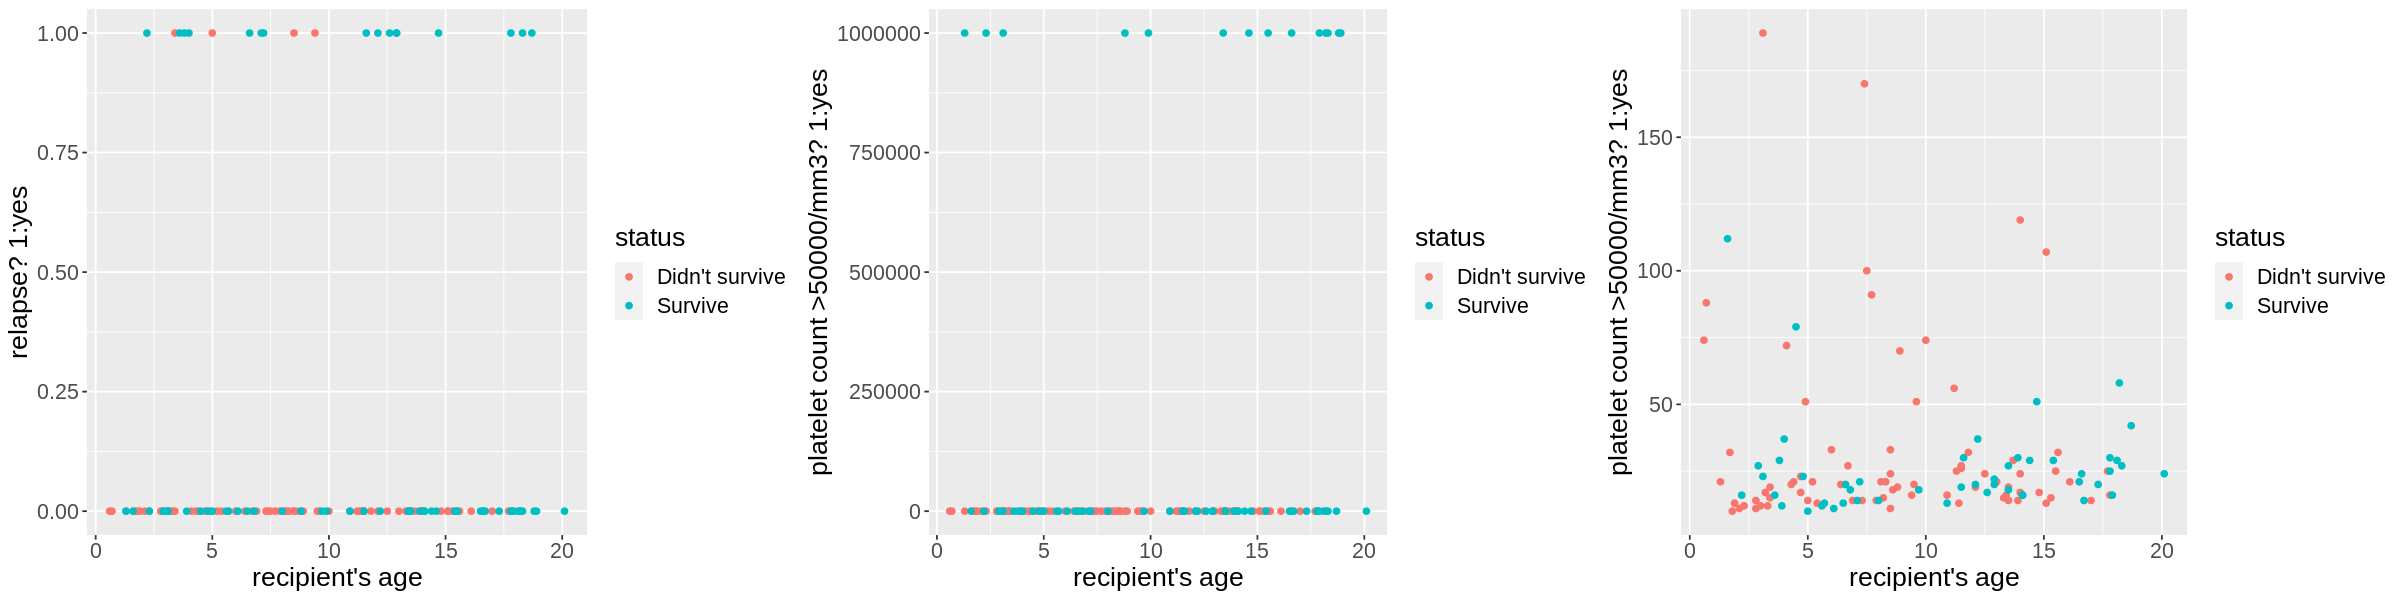

In [28]:
# visualize the relationship between survival rate and (recipientage + relapse), (recipientage + pltrecovery)

plot1 <- bone_training |>
mutate(survival_status  = case_when(
      survival_status  == 1 ~ 'Survive',
      survival_status  == 0 ~ 'Didn\'t survive'))|>
ggplot(aes(x=Recipientage, y = Relapse, color = survival_status ))+
geom_point()+
theme(text=element_text(size=16))+
labs(x="recipient's age", y = "relapse? 1:yes", color = "status")


plot2 <- bone_training |>
mutate(survival_status  = case_when(
      survival_status  == 1 ~ 'Survive',
      survival_status  == 0 ~ 'Didn\'t survive'))|>
ggplot(aes(x=Recipientage, y = PLTrecovery, color = survival_status ))+
geom_point()+
theme(text=element_text(size=16))+
labs(x="recipient's age", y = "platelet count >50000/mm3? 1:yes", color = "status")

plot3 <- bone_training |>
mutate(survival_status  = case_when(
      survival_status  == 1 ~ 'Survive',
      survival_status  == 0 ~ 'Didn\'t survive'))|>
filter(PLTrecovery < 500000)|>
ggplot(aes(x=Recipientage, y = PLTrecovery, color = survival_status ))+
geom_point()+
theme(text=element_text(size=16))+
labs(x="recipient's age", y = "platelet count >50000/mm3? 1:yes", color = "status")

options(repr.plot.width=20, repr.plot.height=5)
grid.arrange(plot1, plot2, plot3, ncol=3)

 - `plot2.0`: the relationship between the recipient's age, relapse and survival status.
 - `plot2.1`: the relationship between the recipient's age, patelet recovery and survival status.
 - `plot2.2`: the relationship between the recipient's age, patelet recovery and survival status, excluding some extreme data.

In [32]:
# analyze the survival rate summary of relapse and patlelet count
PLT_summarize <- bone_training |>
mutate(PLTrecovery = case_when(
    PLTrecovery < 25 ~25,
    PLTrecovery < 50 ~50,
    PLTrecovery < 75 ~ 75,
    PLTrecovery < 100 ~ 100,
    PLTrecovery < 200 ~ 200,
    PLTrecovery == 1000000 ~ 1000000))|>
group_by(PLTrecovery, survival_status)|>
summarize(count=n())|>
pivot_wider(names_from=survival_status,
            values_from=count) |>
rename("survive" = "1", "death" = "0")|>
mutate(survival_rate = ifelse(is.na(death), 1, survive/(death+survive)))|>
arrange(PLTrecovery)
PLT_summarize

relapse_summarize <- bone_training |>
mutate(Relapse = case_when(
    Relapse == 1 ~"yes",
    Relapse == 0 ~"no"))|>
group_by(Relapse, survival_status)|>
summarize(count=n())|>
pivot_wider(names_from=survival_status,
            values_from=count) |>
rename("survive" = "1", "death" = "0")|>
mutate(survival_rate = survive / (survive+death))
relapse_summarize

`summarise()` has grouped output by 'PLTrecovery'. You can override using the
`.groups` argument.


PLTrecovery,death,survive,survival_rate
<dbl>,<int>,<int>,<dbl>
25,50,31,0.3827160
50,12,14,0.5384615
75,7,2,0.2222222
100,2,1,0.3333333
200,5,1,0.1666667
1000000,NA,14,1.0000000


`summarise()` has grouped output by 'Relapse'. You can override using the
`.groups` argument.


Relapse,death,survive,survival_rate
<chr>,<int>,<int>,<dbl>
no,72,47,0.394958
yes,4,16,0.800000


 - `table2.3`: the survival rate based on platelet recovery
 - `table2.4`: the survival rate based on relapse or not

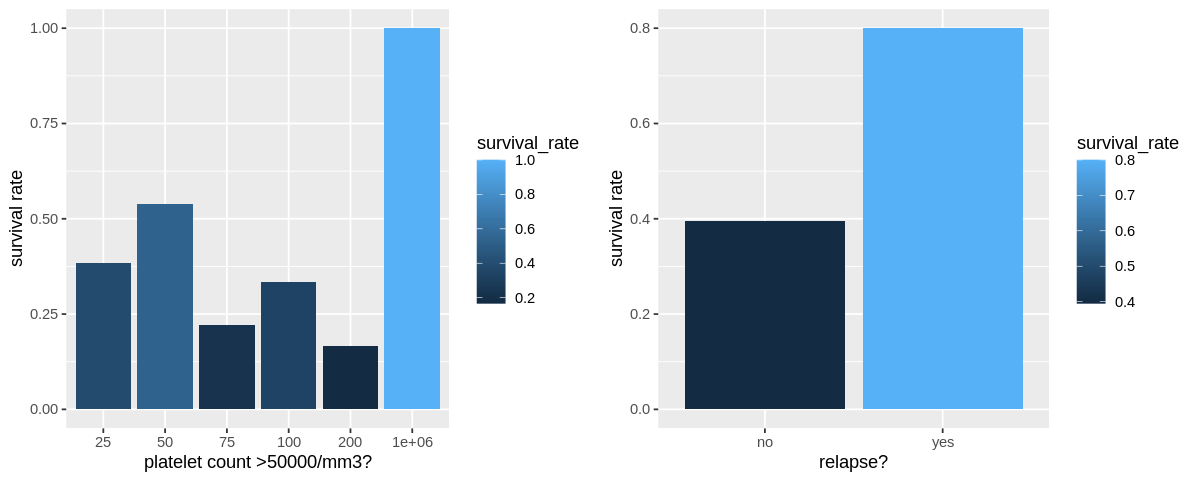

In [34]:
#visualize the survival rate based on relapse and pltrecovery
PLT_plot <- PLT_summarize |>
mutate(PLTrecovery = as.factor(PLTrecovery))|>
ggplot(aes(x=PLTrecovery, y = survival_rate, fill = survival_rate))+
geom_bar(stat = "identity")+
labs(x="platelet count >50000/mm3?", y = "survival rate")

relapse_plot <- relapse_summarize|>
ggplot(aes(x=Relapse, y = survival_rate, fill = survival_rate))+
geom_bar(stat = "identity")+
labs(x="relapse?", y = "survival rate")

options(repr.plot.width=10, repr.plot.height=4)
grid.arrange(PLT_plot, relapse_plot, ncol=2)

 - `plot2.3`: the survival rate vs paletelet recovery count.
 - `plot2.4`: the survival rate vs relapse or not.
 
`METHOD`
- We used a classification model with k-nearest neighbors. As previously mentioned, upon computing the strength of the relationships survival status had with previously mentioned variables, we concluded that platelet recovery time, age and relapse would provide the best predictions for our model.
- The process of actually building the model included 4 main steps: standardizing data, building the model structure, setting the folds and neighbors and building the workflow for the actual model.
- We created 5 folds for our training data and 15 for our k-nearest neighbors value. The model was applied to our testing data.
- Upon building and analyzing our model, we determined that 15 neighbors had the highest mean accuracy among other neighbors ranging from 1 to 25. This was done through a line plot built from the results of the built model and its folds.
Predictors were standardized to avoid a biased model.


In [ ]:
# based on the forward selection, we will choose Recipient age + Relapse + PLTrecovery as our variable.
# standardize data
bone_recipe <- recipe(survival_status ~ Recipientage+Relapse+PLTrecovery, data = bone_training) |>
  step_scale(all_predictors())|>
  step_center(all_predictors())

# build the model structure
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = tune())|>
  set_engine("kknn")|>
  set_mode("classification")

# setting the folds and ks
set.seed(234)
bone_vfold <- vfold_cv(bone_training, v = 5, strata = survival_status)
k_val <- tibble(neighbors = seq(from = 1, to = 25, by = 1))

# build the workflow for building model
knn_fit <- workflow()|>
  add_recipe(bone_recipe)|>
  add_model(knn_spec)|>
  tune_grid(resamples = bone_vfold, grid = k_val)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6045612,5,0.05883035,Preprocessor1_Model01
2,accuracy,binary,0.6045612,5,0.05883035,Preprocessor1_Model02
3,accuracy,binary,0.7043696,5,0.04227367,Preprocessor1_Model03
4,accuracy,binary,0.7043696,5,0.04227367,Preprocessor1_Model04
5,accuracy,binary,0.7122879,5,0.01906110,Preprocessor1_Model05
6,accuracy,binary,0.7122879,5,0.01906110,Preprocessor1_Model06


[1] 15

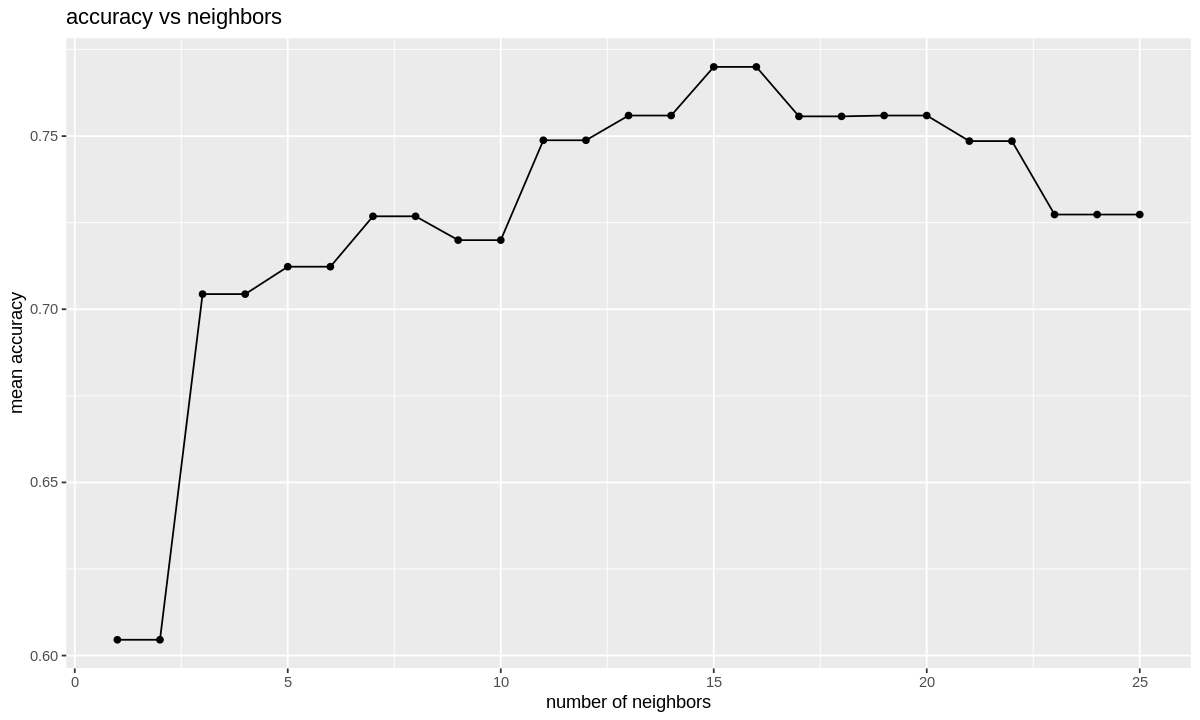

In [39]:
# visualize the result of our model
bone_metric <- knn_fit |>
collect_metrics() |>
filter(.metric == "accuracy") 
head(bone_metric)

options(repr.plot.width=10,repr.plot.height=6)
n_plot <- bone_metric |>
ggplot(aes(x=neighbors, y = mean))+
geom_point()+
geom_line()+
labs(x="number of neighbors", y = "mean accuracy")+
ggtitle("accuracy vs neighbors")
n_plot

nmin <- bone_metric |>
arrange(desc(mean)) |>
slice(1)|>
select(neighbors)|>
pull()
nmin

 - `table2.5`: the first few rows of the result based on number of neighbors.
 - `plot2.5`: number of neighbors vs the accuracy. Based on the chart, we chose the n that gives us the maximum accuracy (n=15)

In [40]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = nmin)|>
  set_engine("kknn")|>
  set_mode("classification")

bone_vfold <- vfold_cv(bone_training, v = 5, strata = survival_status)

# build the workflow for building model
knn_fit <- workflow()|>
add_recipe(bone_recipe)|>
add_model(knn_best_spec)|>
fit(data = bone_training)

bone_pred <- predict(knn_fit, bone_testing) |>
bind_cols(bone_testing |> mutate(survival_status = as.factor(survival_status)))
head(bone_pred)

.pred_class,id,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,ABOmatch,⋯,Relapse,aGvHDIIIIV,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_status
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,5,0,1,33.35890,0,0,0,1,1,⋯,0,1,51.85,3.972255,13.05,9.0,14,14,1000000,0
0,13,1,1,40.86301,1,0,0,0,1,⋯,0,1,15.42,2.734654,5.64,18.1,14,37,1000000,0
1,14,1,0,30.60274,0,1,0,0,1,⋯,1,1,3.14,3.713956,0.85,42.0,20,48,1000000,1
0,21,1,1,43.57808,1,0,1,0,1,⋯,0,1,0.82,0.368720,2.22,62.0,26,30,1000000,1
1,28,1,1,39.98356,1,1,0,1,1,⋯,0,0,11.27,3.242425,3.48,17.0,16,1000000,16,1
1,30,0,1,39.17260,1,1,0,1,0,⋯,1,1,5.86,1.849607,3.17,38.3,15,23,1000000,1


 - `table2.6`: the first 6 prediction of our model combined with other variables from our training data.

In [165]:
bone_test_metric <- bone_pred |>
  metrics(truth = survival_status, estimate = .pred_class) |>
  filter(.metric == "accuracy")
bone_test_metric


# get conf mat
bone_conf <- bone_pred |>
  conf_mat(truth = survival_status, estimate = .pred_class)
bone_conf

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7083333


          Truth
Prediction  0  1
         0 21  9
         1  5 13

 - `table2.7`: the accuracy of our model (70.8%)
 - `table2.8`: the confusion matrix of our result. The precision is 13/18 (72%), and the recall is 13/19 (68%)

# Results and Discussion

# Bibliography